In [2]:
from data_utils import compute_mode_coefficients_from_complex_field
from psf_constants import VALIDATION_COMPLEX_FIELDS_PATH, COMPLEX_NUMBER_NORMALIZATION_CONSTANT

import numpy as np

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))


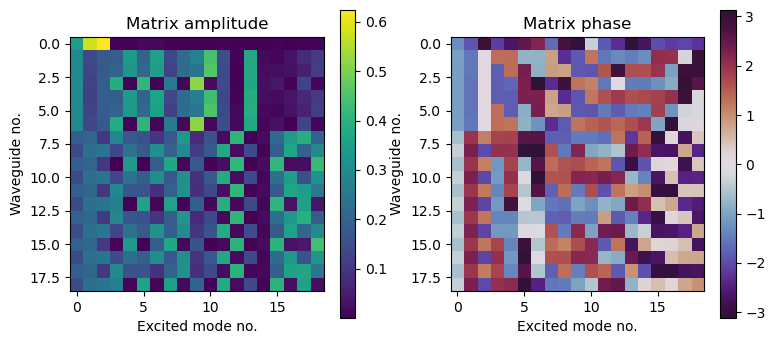

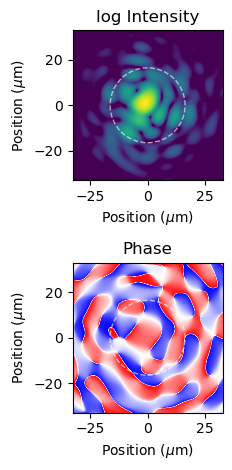

In [4]:
mode_coefficients_list = compute_mode_coefficients_from_complex_field(VALIDATION_COMPLEX_FIELDS_PATH)

In [5]:
len(mode_coefficients_list)

10000

In [8]:
mode_coefficients_list[0].shape

(19,)

In [14]:
np_mode_coefficients = np.stack(mode_coefficients_list)

In [10]:
mode_coeffs = np.load('validation_mode_coefficients.npy')

In [11]:
mode_coeffs.shape

(10000, 19)

In [20]:
first_mode_coeffs = mode_coeffs[:,0]

In [21]:
first_mode_coeffs.shape

(10000,)

In [13]:
int, l2 = compute_L2_norms_modified(mode_coeffs)

In [3]:
def compute_L2_norms(complex_vectors_list):
    L2_norm_list = []
    for complex_vector in complex_vectors_list:
        L2_norm = np.linalg.norm(complex_vector)
        L2_norm_list.append(L2_norm)
        
    return L2_norm_list

def compute_L2_norms_modified(complex_vectors_list):
    L2_sum_list = []
    intensity_sum_list = []
    
    for complex_vector in complex_vectors_list:
        intensity_sum_list.append(np.sum(np.abs(complex_vector)**2)) # Total amount of flux in the image
        L2_sum_list.append(np.sum(np.abs(complex_vector)**4))
        
    return intensity_sum_list, L2_sum_list

In [18]:
L2_norm_list = compute_L2_norms(np_mode_coefficients)

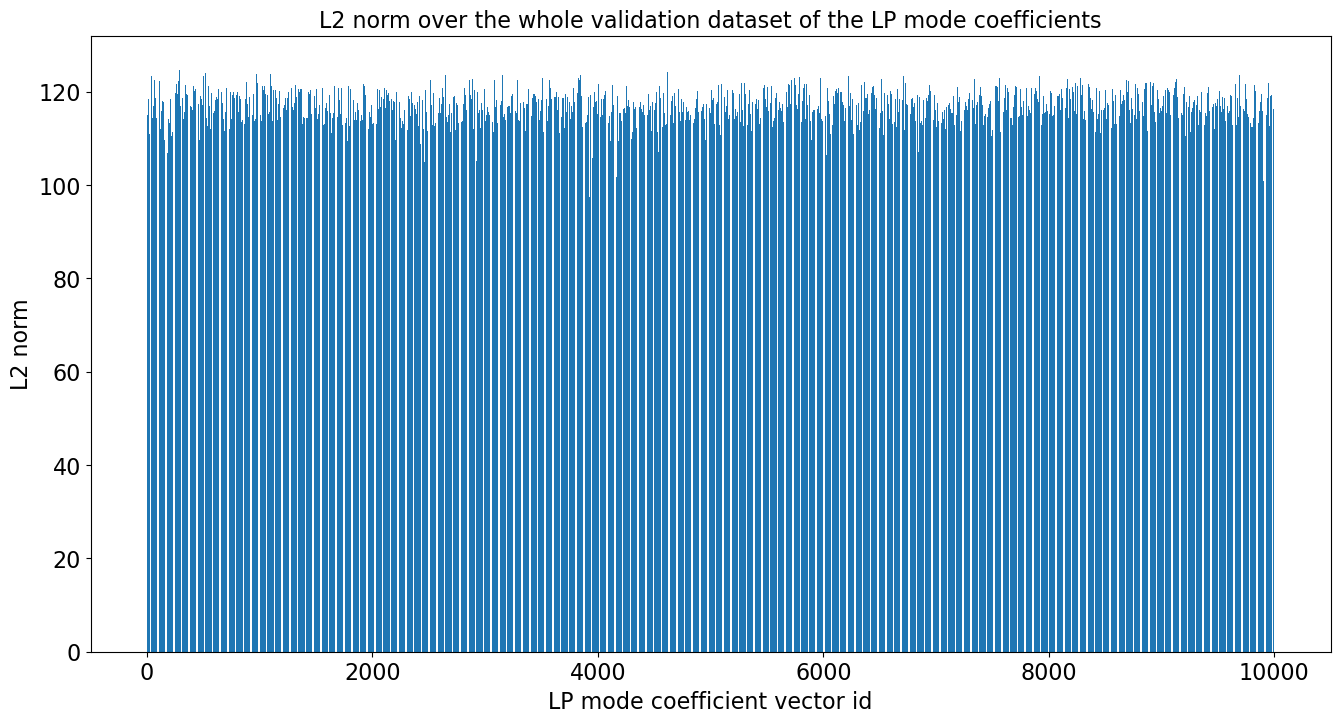

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 10001)], L2_norm_list)
plt.xlabel('LP mode coefficient vector id', fontsize=16)
plt.ylabel('L2 norm', fontsize=16)
plt.title('L2 norm over the whole validation dataset of the LP mode coefficients',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [4]:
validation_psf_electric_fields = np.load(VALIDATION_COMPLEX_FIELDS_PATH)
validation_psf_electric_fields.shape

(10000, 128, 128)

In [5]:
validation_psf_electric_fields = validation_psf_electric_fields.reshape(10000, 128*128)
validation_psf_electric_fields.shape

(10000, 16384)

In [7]:
intensities_sum_list, l2_norm_sum_list = compute_L2_norms_modified(validation_psf_electric_fields/COMPLEX_NUMBER_NORMALIZATION_CONSTANT)

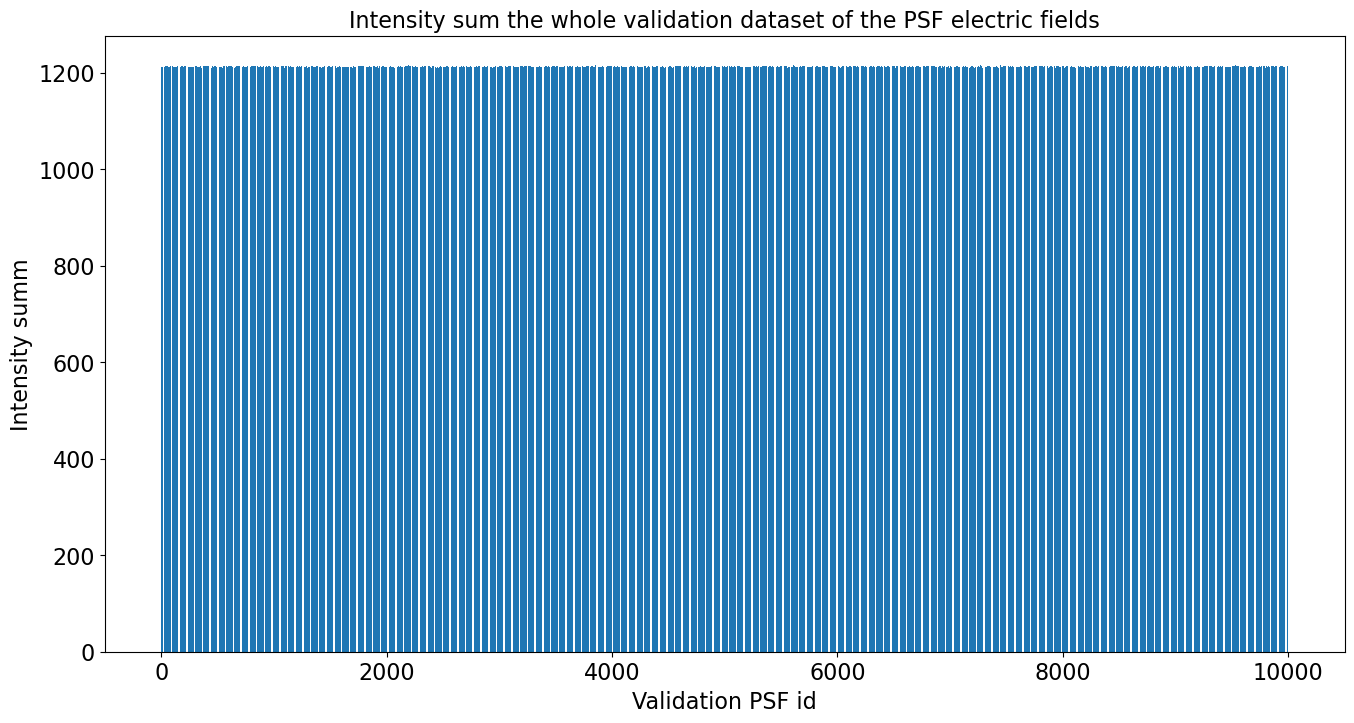

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 10001)], intensities_sum_list)
plt.xlabel('Validation PSF id', fontsize=16)
plt.ylabel('Intensity summ', fontsize=16)
plt.title('Intensity sum the whole validation dataset of the PSF electric fields',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

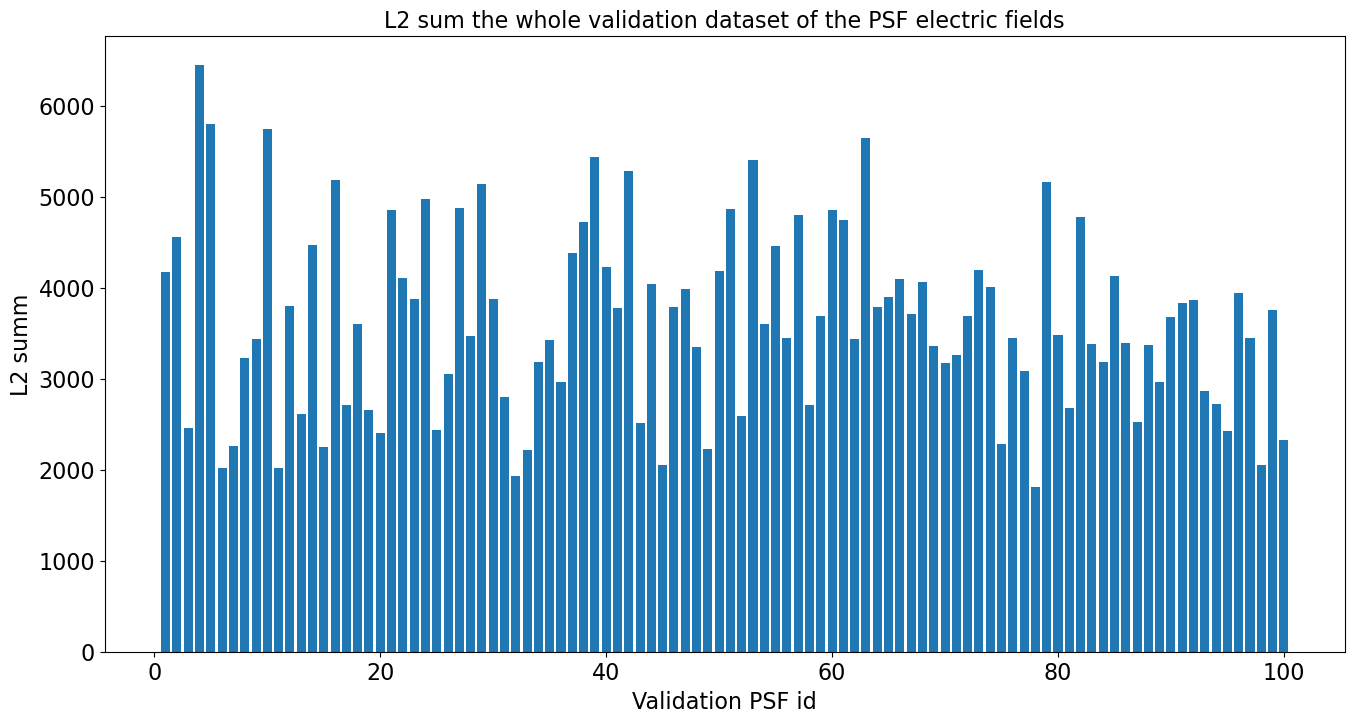

In [19]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], l2_norm_sum_list[:100])
plt.xlabel('Validation PSF id', fontsize=16)
plt.ylabel('L2 summ', fontsize=16)
plt.title('L2 sum the whole validation dataset of the PSF electric fields',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

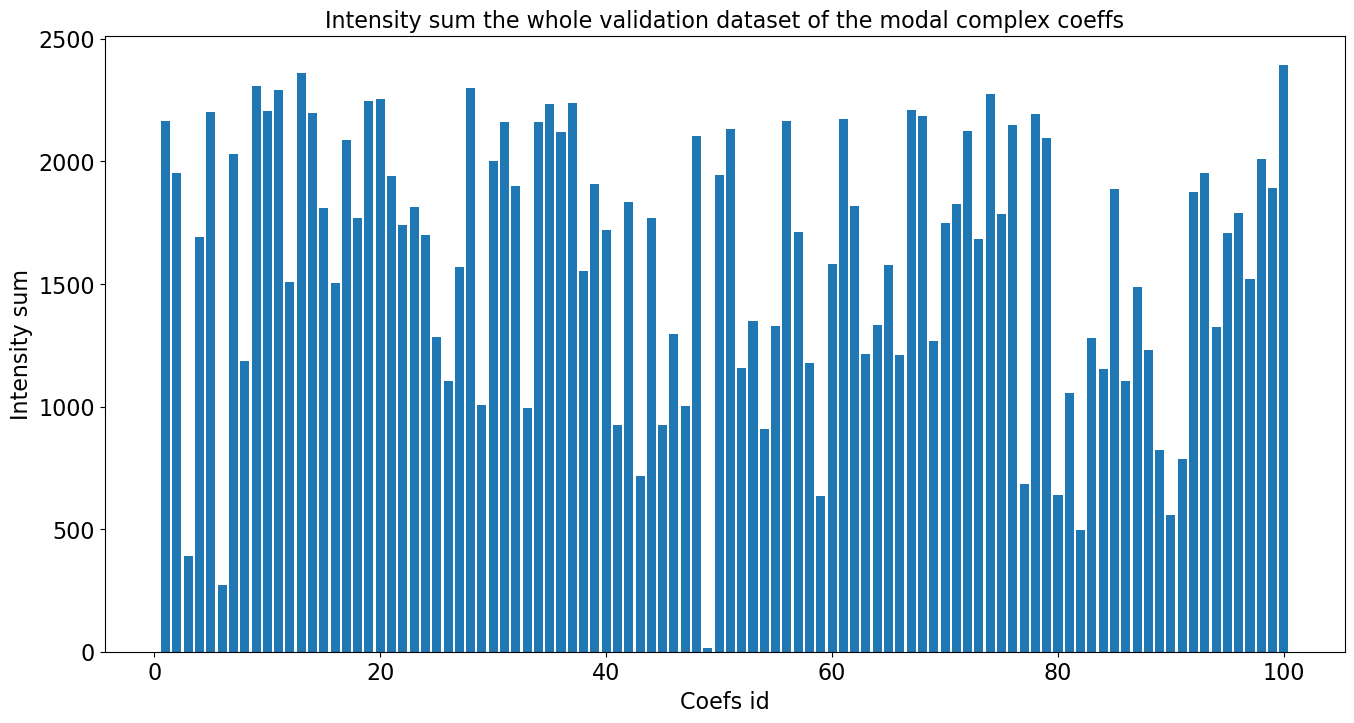

In [24]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], np.abs(first_mode_coeffs[:100])**2)
plt.xlabel('Coefs id', fontsize=16)
plt.ylabel('First mode abs sqr', fontsize=16)
plt.title('First mode abs sqr the whole validation dataset of the modal complex coeffs',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 101)], int[:100])
plt.xlabel('Coefs id', fontsize=16)
plt.ylabel('Intensity sum', fontsize=16)
plt.title('Intensity sum the whole validation dataset of the modal complex coeffs',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [50]:
electric_fields_l2_norms_list = compute_L2_norms(validation_psf_electric_fields/COMPLEX_NUMBER_NORMALIZATION_CONSTANT)

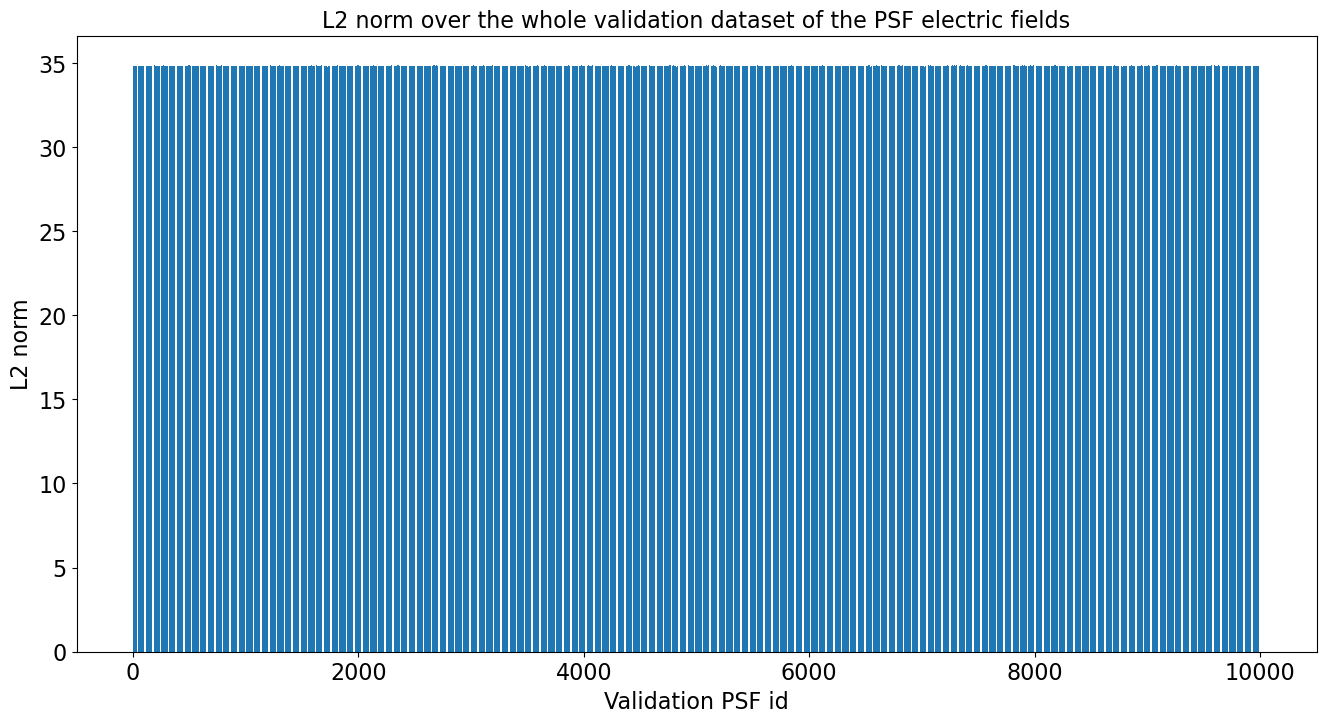

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
#plt.scatter([i for i in range(1, 10001)], L2_norm_list, marker='o', s=2)
plt.bar([i for i in range(1, 10001)], electric_fields_l2_norms_list)
plt.xlabel('Validation PSF id', fontsize=16)
plt.ylabel('L2 norm', fontsize=16)
plt.title('L2 norm over the whole validation dataset of the PSF electric fields',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [52]:
correlation_coefficient = np.corrcoef(L2_norm_list, electric_fields_l2_norms_list)[0, 1]

print("Pearson correlation coefficient:", correlation_coefficient)

Pearson correlation coefficient: 0.1451513895198259
